<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling I
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>DataFrame Pandas;</li>
  <li>Selecão e Filtros;</li>
  <li>Inserção, Deleção e Atualização.</li>
</ol>

---

# **Exercícios**

## 1\. Fortune 500

O [Fortune 500](https://fortune.com/fortune500/2021/search/) é uma ranking anual compilado pela revista Fortune das 500 maiores empresas dos EUA. 

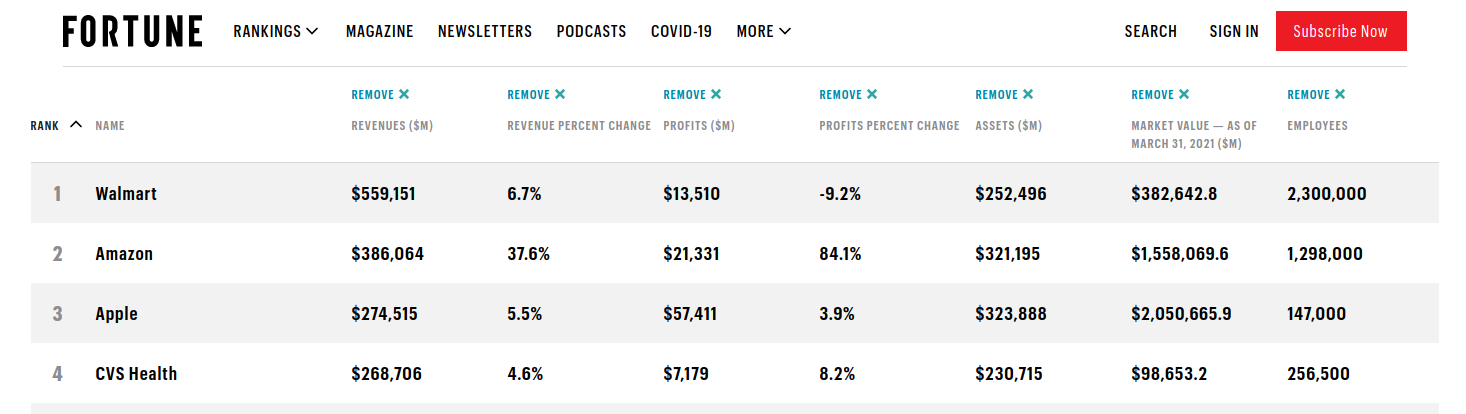

O arquivo `fortune.html` contem o código fonte em HTML da página com as 100 primeiras empresas do ranking. **Carregue-o na máquina virtual do Google Colab**.

Utilize o pacote Python `beautifulsoup4` para extrair todas as 100 empresas do arquivo `fortune.html` providenciado. Salve os dados extraidos no arquivo `fortune.csv` separado por `;`. Exemplo das três primeiras linhas (sem o cabeçalho):

```
1;Walmart;$559,151;6.7%;$13,510;-9.2%;$252,496;$382,642.8;2,300,000
2;Amazon;$386,064;37.6%;$21,331;84.1%;$321,195;$1,558,069.6;1,298,000
3;Apple;$274,515;5.5%;$57,411;3.9%;$323,888;$2,050,665.9;147,000
```

**Dica**: Utilize os código abaixo para ajudar na extração dos dados.

**Dica**: Você não precisa extrair o cabeçalho da tabela, utilize o nome das colunas armazenados na variável `header` abaixo.

In [1]:
# ler o arquivo fortune.html
from bs4 import BeautifulSoup

with open("fortune.html") as fortune_html_page:
  pagina = BeautifulSoup(fortune_html_page, "html.parser")

In [2]:
# extrair as linhas da tabela

tabela = pagina.find('div', {'class': 'rt-table'})
linhas = tabela.find('div', {'class': 'rt-tbody'})

In [3]:
# extrair o conteudo das linhas da tabela

conteudo_extraido = []

for linha in linhas:
  colunas = linha.find('div', {'role': 'row'})
  conteudo = colunas.get_text(";").split(";")
  conteudo_extraido.append(conteudo)

# 3 primeiras linhas
for i in range(0, 3):
  print(conteudo_extraido[i])

['1', 'Walmart', '$559,151', '6.7%', '$13,510', '-9.2%', '$252,496', '$382,642.8', '2,300,000']
['2', 'Amazon', '$386,064', '37.6%', '$21,331', '84.1%', '$321,195', '$1,558,069.6', '1,298,000']
['3', 'Apple', '$274,515', '5.5%', '$57,411', '3.9%', '$323,888', '$2,050,665.9', '147,000']


In [4]:
# escrever o conteudo extraido no arquivo fortune.csv
# utilize a variavel header para construir a o cabecalho do arquivo csv
from csv import writer

header = [
  'rank', 
  'name', 
  'revenues', 
  'revenues-percent-change', 
  'profits', 
  'profits-percent-change', 
  'assets', 
  'market-value',
  'employees'
]

with open('fortune.csv', mode='a') as file:
  writer = writer(file)
  if file.tell() == 0:
    writer.writerow(header)
  for conteudo in conteudo_extraido:
    writer.writerow(conteudo)

---

## 2\. Data Wrangling

### **2.1. Criando o DataFrame** 

Crie o dataframe Pandas na variável `fortune_df` através da leitura do arquivo `fortune.csv`

In [5]:
import pandas as pd

fortune_df = pd.read_csv("fortune.csv")

### **2.2. Explorando o DataFrame** 

Utilizando os métodos vistos em aula, explore o dataframe.

 - Liste as 10 primeiras linhas do dataframe:

In [6]:
fortune_df.head(10)

,rank,name,revenues,revenues-percent-change,profits,profits-percent-change,assets,market-value,employees
0,1,Walmart,"$559,151",6.7%,"$13,510",-9.2%,"$252,496","$382,642.8","2,300,000"
1,2,Amazon,"$386,064",37.6%,"$21,331",84.1%,"$321,195","$1,558,069.6","1,298,000"
2,3,Apple,"$274,515",5.5%,"$57,411",3.9%,"$323,888","$2,050,665.9","147,000"
3,4,CVS Health,"$268,706",4.6%,"$7,179",8.2%,"$230,715","$98,653.2","256,500"
4,5,UnitedHealth Group,"$257,141",6.2%,"$15,403",11.3%,"$197,289","$351,725","330,000"
5,6,Berkshire Hathaway,"$245,510",-3.6%,"$42,521",-47.8%,"$873,729","$587,823","360,000"
6,7,McKesson,"$231,051",7.8%,$900,2547.1%,"$61,247","$31,044","70,000"
7,8,AmerisourceBergen,"$189,893.9",5.7%,"$-3,408.7",-498.5%,"$44,274.8","$24,169.7","21,500"
8,9,Alphabet,"$182,527",12.8%,"$40,269",17.3%,"$319,616","$1,392,561.8","135,301"
9,10,Exxon Mobil,"$181,502",-31.5%,"$-22,440",-256.5%,"$332,750","$236,355.4","72,000"


 - Liste os tipos de dados armazenados na coluna do dataframe:

In [7]:
fortune_df.dtypes

rank                        int64
name                       object
revenues                   object
revenues-percent-change    object
profits                    object
profits-percent-change     object
assets                     object
market-value               object
employees                  object
dtype: object

 - Liste o numero de linhas e colunas do dataframe:

In [8]:
linhas = fortune_df.shape[0]
colunas = fortune_df.shape[1]
print(f'Linhas: {linhas}\nColunas: {colunas}')

Linhas: 400
Colunas: 9


### **2.3. Limpando o DataFrame** 

Grande parte das colunas numéricas (exceto a coluna `ranking` e `employees`) possuem o caracter `$` ou `%` que as classificam com o tipo `object` (ou `str` do Python) ao invés do tipo correto como `int` ou `float`. Utilizando os métodos de atualizam, remova os caracteres das linhas das colunas numéricas.


In [9]:
fortune_df.columns

Index(['rank', 'name', 'revenues', 'revenues-percent-change', 'profits',
       'profits-percent-change', 'assets', 'market-value', 'employees'],
      dtype='object')

In [10]:
# colunas com "$" and vírgulas desnecessárias:
fortune_df['revenues'] = fortune_df['revenues'].apply(
    lambda record: record.replace('$', '').replace(',', '')
)

fortune_df['profits'] = fortune_df['profits'].apply(
    lambda record: record.replace('$', '').replace(',', '')
)

fortune_df['assets'] = fortune_df['assets'].apply(
    lambda record: record.replace('$', '').replace(',', '')
)

fortune_df['market-value'] = fortune_df['market-value'].apply(
    lambda record: record.replace('$', '').replace(',', '')
)

# colunas com "%":
fortune_df['revenues-percent-change'] = fortune_df['revenues-percent-change']\
    .apply(lambda record: record.replace('%', '')
)

fortune_df['profits-percent-change'] = fortune_df['profits-percent-change']\
    .apply(lambda record: record.replace('%', '')
)

# retirando as vírgulas da coluna employees:
fortune_df['employees'] = fortune_df['employees']\
    .apply(lambda record: record.replace(',', '')
)
    
# checagem:
fortune_df

,rank,name,revenues,revenues-percent-change,profits,profits-percent-change,assets,market-value,employees
0,1,Walmart,559151,6.7,13510,-9.2,252496,382642.8,2300000
1,2,Amazon,386064,37.6,21331,84.1,321195,1558069.6,1298000
2,3,Apple,274515,5.5,57411,3.9,323888,2050665.9,147000
3,4,CVS Health,268706,4.6,7179,8.2,230715,98653.2,256500
4,5,UnitedHealth Group,257141,6.2,15403,11.3,197289,351725,330000
...,...,...,...,...,...,...,...,...,...
395,96,3M,32184,0.1,5384,17.8,47344,111642.1,94987
396,97,TJX,32137,-23,90.5,-97.2,30813.6,79774.9,320000
397,98,Travelers,31981,1.3,2697,2.9,116764,37933,30294
398,99,Capital One Financial,31643,-6.3,2714,-51.1,421602,58097,51985


**Dica**: Você pode utilizar qualquer método de atualização, eu recomendo o uso do método `apply`.

### **2.4. Salvando o DataFrame** 

Utilize o método `to_csv` para salvar o dataframe `fortune_df` no arquivo `fortune-limpo.csv`.


In [11]:
fortune_df.to_csv('fortune-limpo.csv', index=False)

**Dica**: Confira a documentação oficial do método `to_csv` neste [link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html).

---